# Algoritmes de Classificació

## Objectius
    Neteja i interpretació de les dades.
    Preprocessats.
    Creació de models de classificació (arbres de classificació, KNN - k-Nearest neighbors, regressió logística, support vector machine, XGboost, altres models...).
    Utilització de les mètriques per interpretar els resultats.
    Estudi i modificació de paràmetres.

## Importació i exploració de dades

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

import missingno as msno
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier --> ya esta
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [3]:
# Ocultar Warnings
import warnings

# Ignorar FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


In [4]:
# Imprimir el fitxer txt    
with open("wineNames.txt") as wineNames:
    print(wineNames.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

### Descripció de les variables:
1) Alcohol: <br/> L'alcohol en el vi es refereix al contingut d'etanol i afecta la sensació de calor i la intensitat del vi.
   <br/> <br/>
2) Malic acid: <br/>L'àcid màlic contribueix a l'acidesa del vi i pot influir en el seu sabor, aportant notes àcides o fresques.
    <br/>   <br/>
3) Ash: <br/>La cendra és la quantitat de minerals presents en el vi després de l'evaporació, la qual cosa pot estar relacionada amb la qualitat de la raïm i el procés de vinificació.
    <br/> <br/>
4) Alcalinity of ash: <br/>L'alcalinitat de la cendra es refereix al nivell d'alcalinitat dels minerals en el vi i pot afectar el seu sabor i estabilitat.
    <br/> <br/>
5) Magnesium:<br/> El magnesi és un mineral que pot influir en la percepció del sabor i la textura del vi.
    <br/> <br/>
6) Total phenols:<br/> Els fenols totals són compostos que poden contribuir a l'estructura i el sabor del vi, així com a la seva capacitat antioxidant.
    <br/> <br/>
7) Flavanoids:<br/> Els flavonoides són un tipus de fenols que aporten sabor i color al vi, contribuint al seu perfil d'aroma i gust.
    <br/> <br/>
8) Nonflavanoid phenols: Els fenols no flavonoides (Nonflavanoid phenols) són altres compostos fenòlics que poden tenir efectes en la textura i el sabor del vi.
    <br/> <br/>
9) Proanthocyanins: <br/>Les proantocianidines són compostos fenòlics que poden contribuir a l'astringència i l'estructura del vi.
    <br/> <br/>
10) Color intensity:<br/> La intensitat del color es refereix a la profunditat i riquesa del color del vi, la qual cosa pot estar relacionada amb la concentració de pigments.
    <br/> <br/>
11) Hue: <br/>La to es refereix al matís del color del vi, que pot variar des de vermell a morat, per exemple.
    <br/> <br/>
12) OD280/OD315 of diluted wines: La relació OD280/OD315 de vins diluïts és una mesura que pot indicar la concentració de compostos fenòlics en el vi.
    <br/> <br/>
13) Proline: La prolina és un aminoàcid que pot influir en la textura i el sabor del vi, i també s'utilitza per avaluar la maduresa de la raïm.
 <br/> <br/>
    

#### Importar dades crues des de txt


In [5]:
df = pd.read_csv("wineData.txt", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Afegir columnes 
df.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
# Comprovar que les classes són les mateixes que les descrites a wineNames.txt
# Class Distribution: number of instances per class
# class 1 59
# class 2 71
# class 3 48
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

Falta una dada de la class 1 respecte a wineNames.txt. Hem comprovat amb la suma total (177 rows) i podem confirmar que segons wineNames.txt hauria d'haver una línia més de la class 1 (9 + 71 + 48 = 178, contra 177 línies)


#### Comprovació de valors nuls 

In [8]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [9]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

No hi ha valors nuls.

#### Comprovació de duplicats

In [10]:
df[df.duplicated()]


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline


No hi ha valos duplicats

<Axes: >

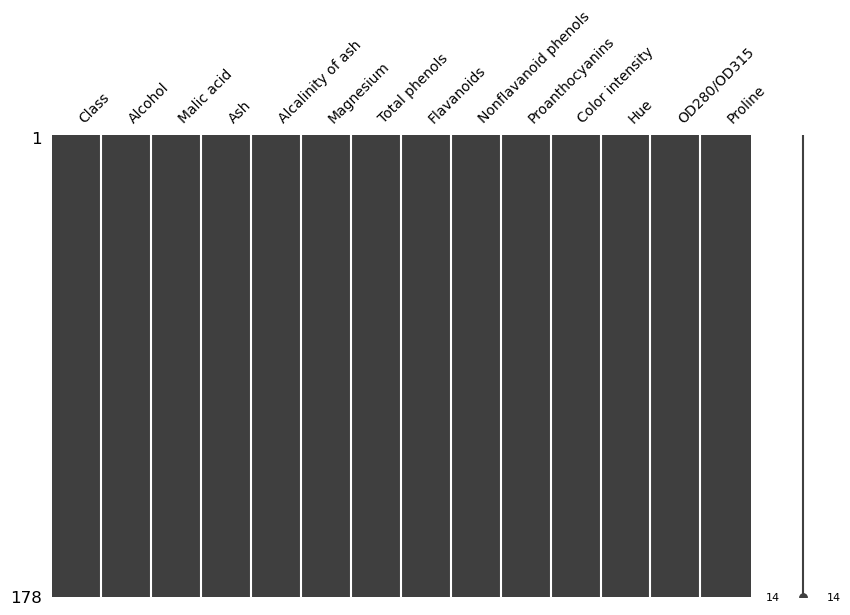

In [11]:
# Comprovem valors perduts
import missingno as msno
msno.matrix(df, figsize=(10,6),fontsize=(10))


No hi ha valors perduts

In [12]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

Les dades són floats i integers.

#### Exploració de variables

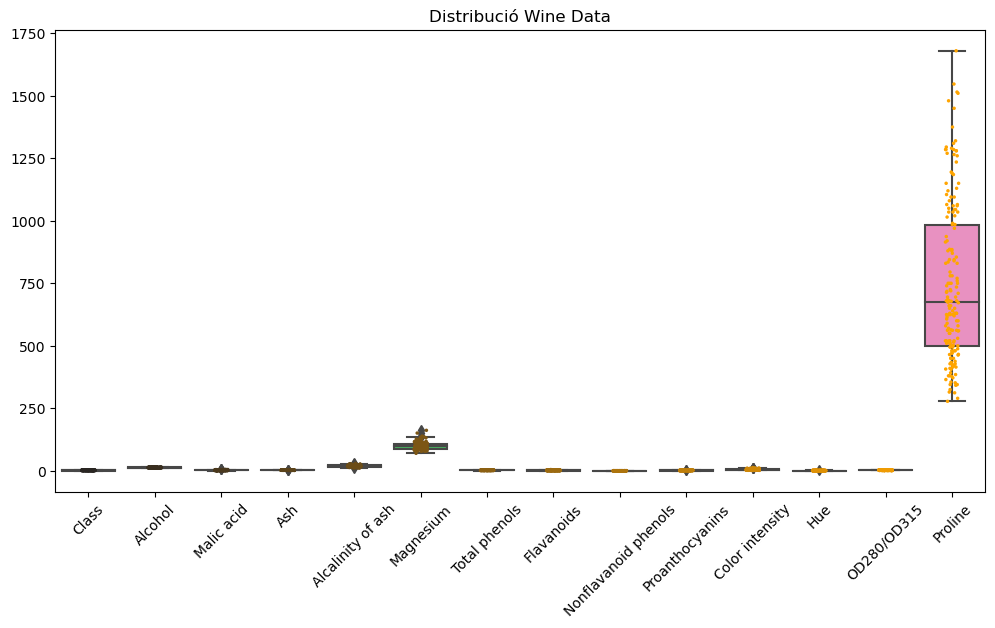

In [13]:
# Boxplot amb jitter per explorar dades

# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df)
sns.stripplot(data=df, color="orange", jitter=0.1, size=2.5)
plt.title('Distribució Wine Data')
plt.xticks(rotation=45)
plt.show()


Amb els valors alts de proline, no es pot visualitzar la resta de vaiables. Refarem el boxplot sense la columna "Proline" i treurem també "Magnesium" per explorar la resta de variables.

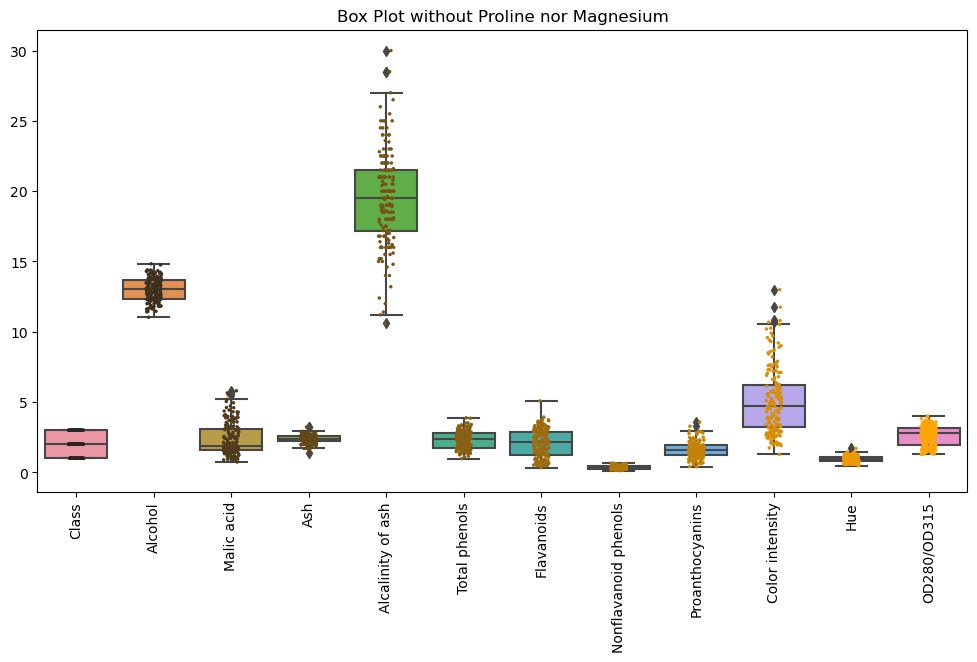

In [14]:
# Seleccionar columnes
columns_to_plot = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315"]

# Crear df
df_noproline = df[columns_to_plot]

# Boxplot amb jitter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_noproline)
sns.stripplot(data=df_noproline, color="orange", jitter=0.1, size=2.5)

plt.xticks(rotation=90)
plt.title("Box Plot without Proline nor Magnesium")
plt.show()



Veiem que la distribució de cada variable és bastant compacta dins de la seva forquilla de valors i que hi ha en general pocs outliers.

A primera vista, la distribució d'algunes variables podria ser gaussiana. Ho analitzarem més endavant.

A continuació explorem la correlació de les varibales a través d'un mapa de calor.

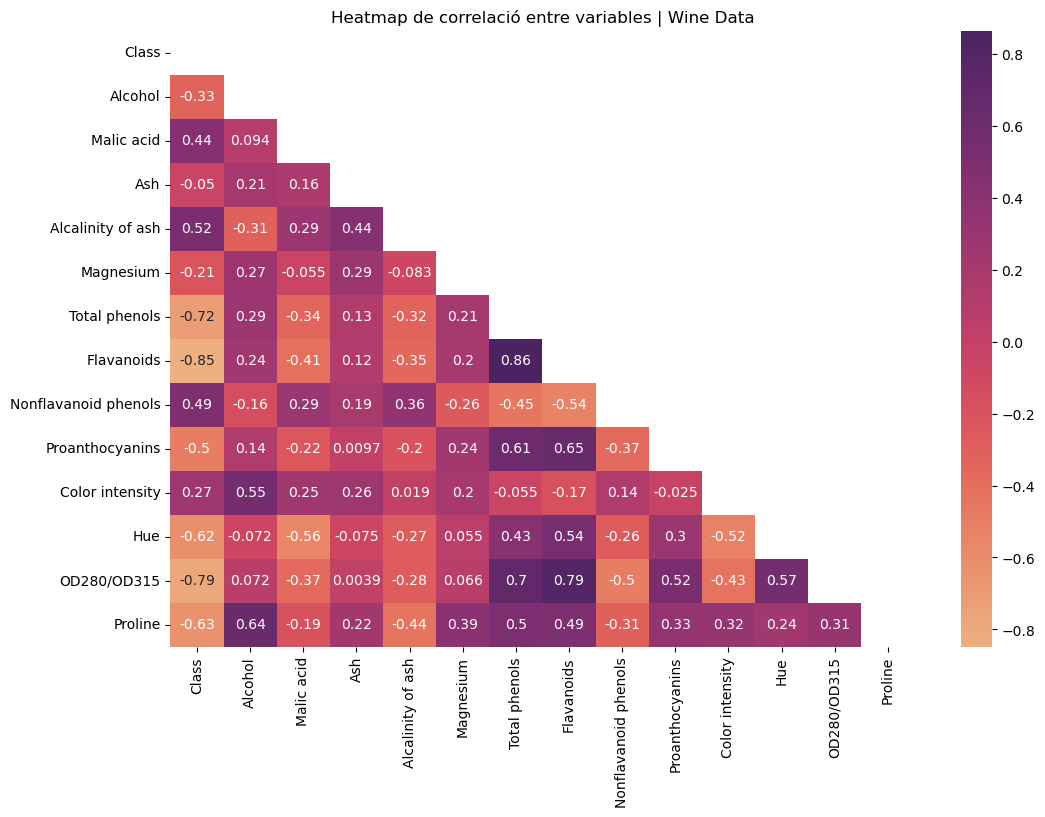

In [15]:
plt.figure(figsize=(12, 8))
matriz_corr = df.corr()

# Màscara per a ocultar la meitat superior del mapa de calor
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# MAPA DE CALOR
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(matriz_corr, annot=True, cmap=cmap, mask=mask)
plt.title('Heatmap de correlació entre variables | Wine Data')
plt.show()

Les correlacions més significatives són entre:
1. Flavanoids i OD280/OD315: Al ser els flavonoides fenols, sembla lògic que afecte a la relació OD280/OD315 de vins diluïts, que al final és una mesura que pot indicar la concentració de compostos fenòlics en el vi.
2. Flavanoids i total fenols: el fet de que ambdues variables recullen fenols explica la forta correlació entre elles.

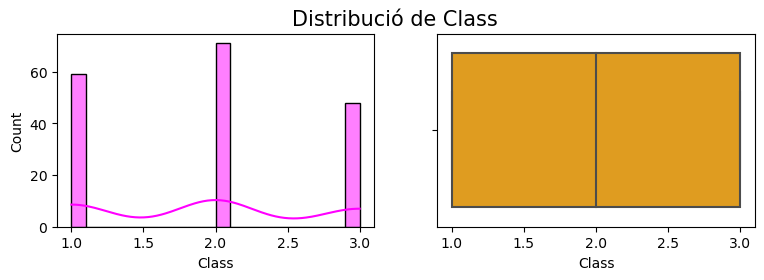

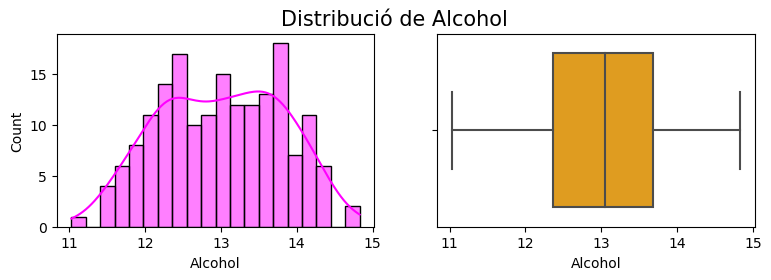

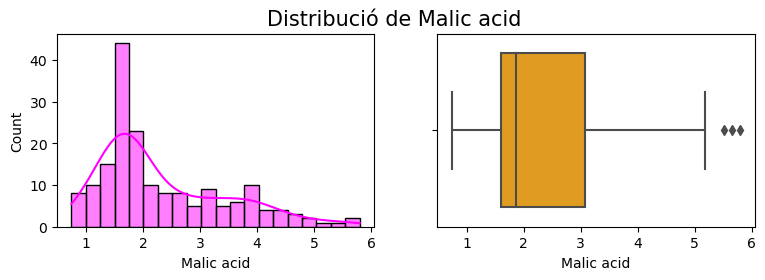

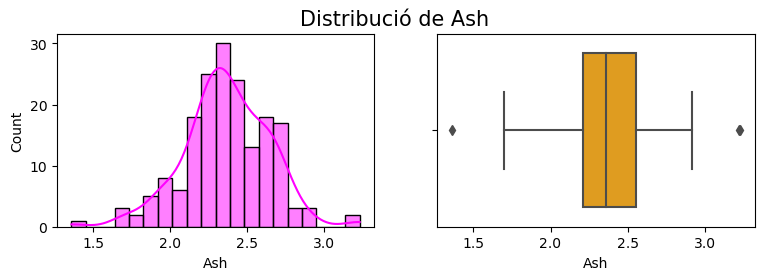

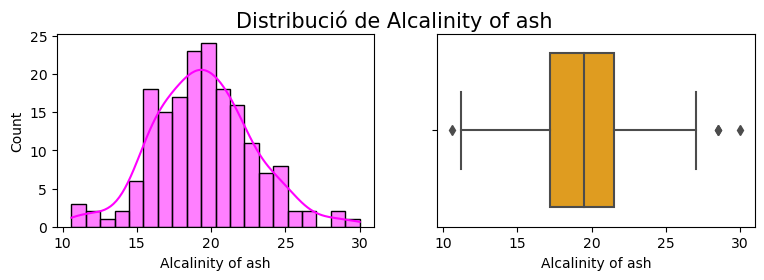

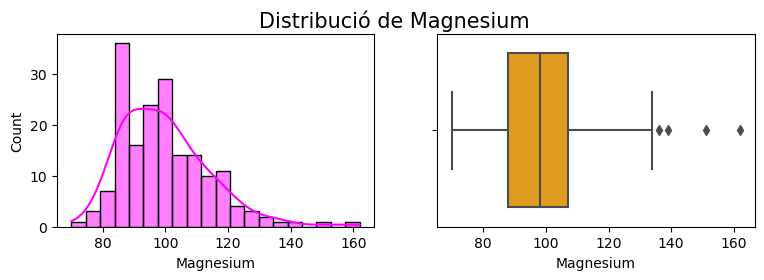

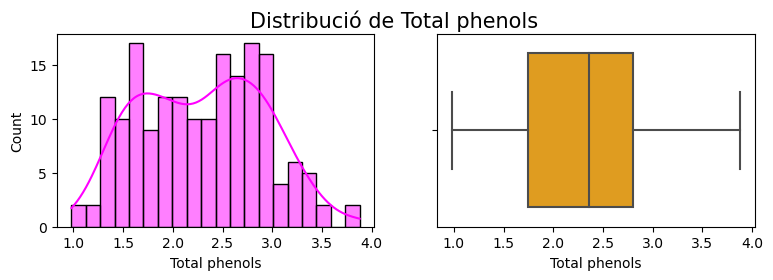

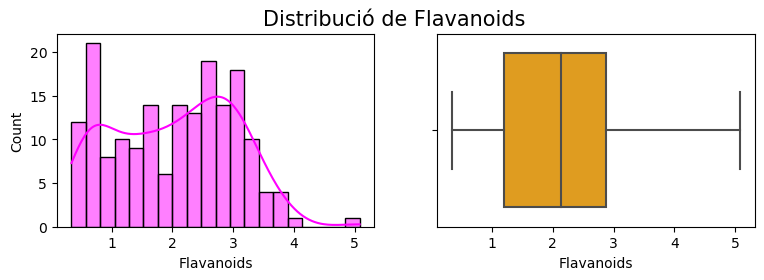

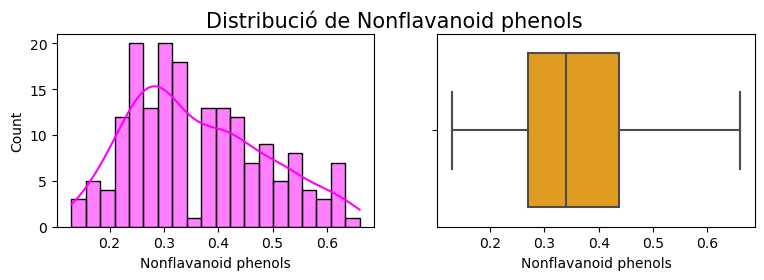

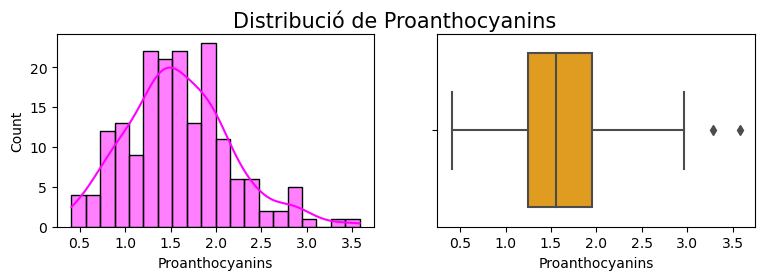

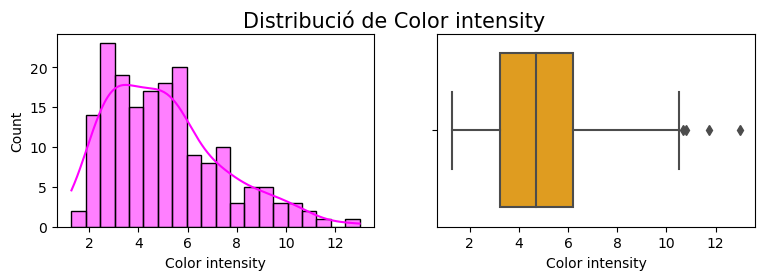

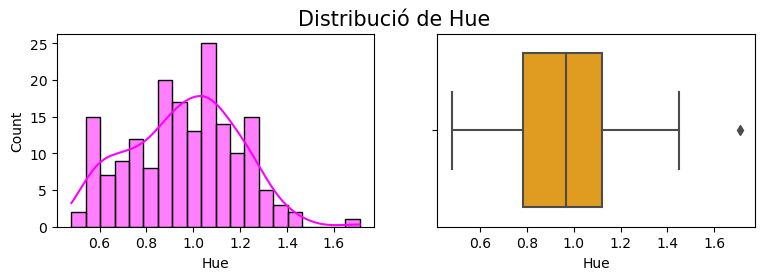

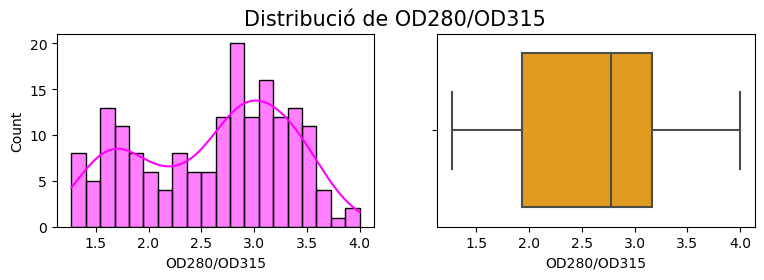

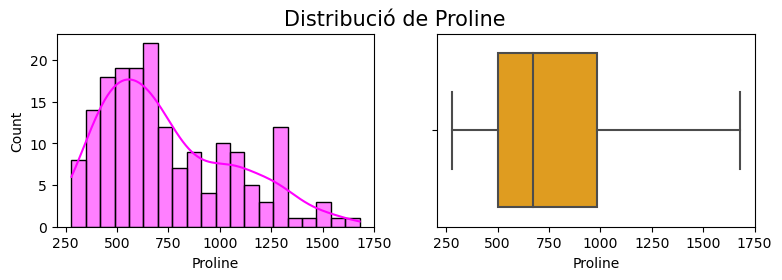

In [16]:
# Comprovar la distribució i els outliers
for column in df.columns:
    fig, axes = plt.subplots(1,2, figsize = (9,2.5))
    fig.suptitle(f'Distribució de {column}', fontsize=15) 
    sns.histplot(data=df, ax=axes[0],  x=df[column], bins=20, color='magenta', kde=True)
    sns.boxplot(ax=axes[1], x =df[column], color='orange')

### Prova de Shapiro-Wilk
Realitzem aquesta prova per saber si la mostra de dades té una distribució gaussiana.

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).
#### Interpretació

#### H<sub>0</sub> : la mostra té una distribució gaussiana.

#### H<sub>1</sub>: la mostra no té una distribució gaussiana.

In [17]:
# Shapiro-Wilk Normality Test

for column in df.columns:
    stat, p = shapiro(df[column])
    
    print("*"*50)
    print(column, "| Tipus de dada:", df[column].dtypes)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('La distribució probablement ÉS gaussiana')
    else:
        print('La distribució probablement NO és gaussiana')
    print("*"*50,"\n")

**************************************************
Class | Tipus de dada: int64
stat=0.804, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Alcohol | Tipus de dada: float64
stat=0.982, p=0.020
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Malic acid | Tipus de dada: float64
stat=0.889, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Ash | Tipus de dada: float64
stat=0.984, p=0.039
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Alcalinity of ash | Tipus de dada: float64
stat=0.990, p=0.264
La distribució probablement ÉS gaussiana
**********************************************

L'única variable que presenta una distribució gaussiana és Alcalinity of ash, i per tant serà processada amb <strong> StandarScaler </strong>

Pel que fa als outliers, ja els hem visualitzat en el boxplot però també podem fer un contatge per saber amb precisióo el número exacte.

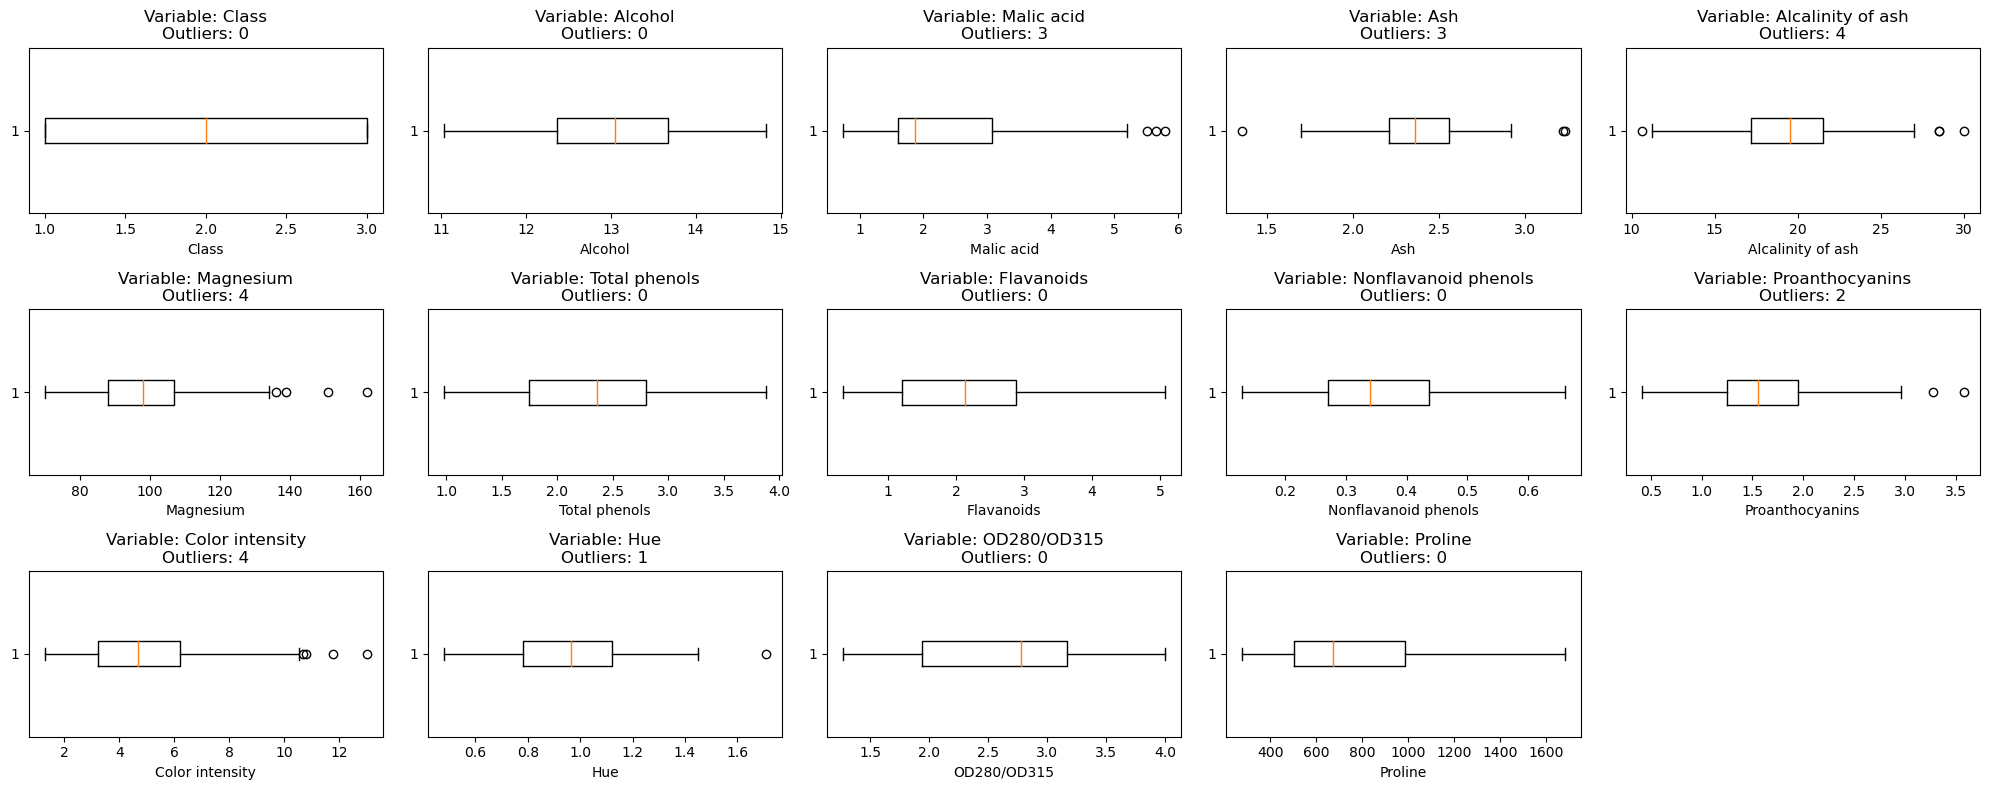

In [18]:
# Llista per contatge d'outliers
num_outliers = []

# Número de columnes per fila
columnes_per_fila = 5

# Calcula el número total de files necessàries
num_files = math.ceil(len(df.columns) / columnes_per_fila)

# Mides del canvas
plt.figure(figsize=(20, 8))

# Iteració per columnes amb contatge d'outliers
for i, column in enumerate(df.columns):
    # Càlcul d'el IQR per a cada columna
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Càlcul dels límits per detectar outliers
    limit_inferior = Q1 - 1.5 * IQR
    limit_superior = Q3 + 1.5 * IQR

    # Contatge de outliers amb append
    outliers = df[(df[column] < limit_inferior) | (df[column] > limit_superior)]
    num_outliers.append(len(outliers))

    # Pintar boxplots individuals
    plt.subplot(num_files, columnes_per_fila, i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Variable: {column}\nOutliers: {len(outliers)}')
    plt.xlabel(column)

# Marge entre els subplots
plt.tight_layout()

plt.show()

Les variables amb outliers són:
"Malic acid", "Magnesium", "Proanthocyanins", "Color intensity", "Hue".

Seran processades amb <strong>RobustScaler</strong>

La resta de variables seran processades amb <strong>ScalerNorm</strong>

En resum, <strong>les tècniques de normalització de dades seran les següents:</strong>
1. StandardScaler (gaussianes): "Alcalinity of ash"
2. RobustScaler (no gaussianes, outliers): "Malic acid", "Magnesium", "Proanthocyanins", "Color intensity", "Hue"
3. ScalerNorm (no gussianes, no outliers): "Alcohol", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "OD280/OD315", "Proline"
    

Per últim, explorem la variable categòrica 'Class' per saber-ne la distribució i altres característiques:

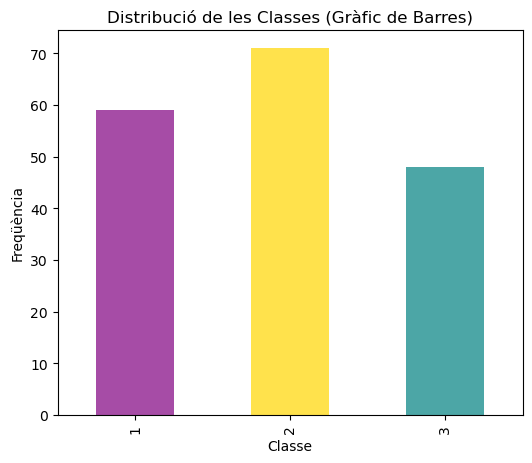

In [19]:
# Gràfic de barres
fig, ax = plt.subplots(figsize=(6, 5))
class_counts = df['Class'].value_counts().sort_index()
colors = ['purple', 'gold', 'teal']
class_counts.plot.bar(color=colors, alpha=0.7, ax=ax)
ax.set_xlabel('Classe')
ax.set_ylabel('Freqüència')
ax.set_title('Distribució de les Classes (Gràfic de Barres)')
plt.show()

Els gràfics representen la distribució de la variable "Classe", mostrant que les classes estan equilibrades sense una dominant.

El gràfic de barres mostra que la classe 2 és la més nombrosa però sense una gran diferència envers el reste de classes.

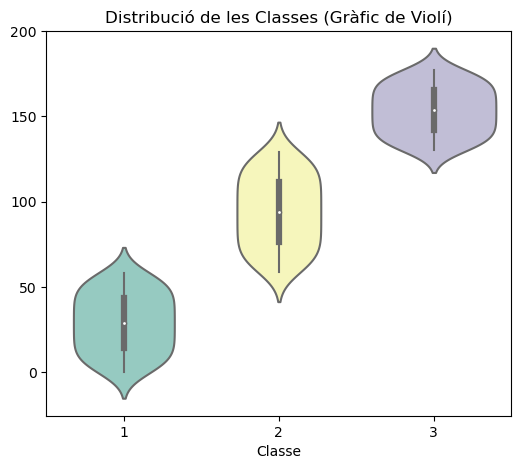

In [20]:
# Gràfic de violí
plt.figure(figsize=(6, 5))
sns.violinplot(x='Class', y=df.index, data=df, palette='Set3')
plt.xlabel('Classe')
plt.ylabel('')
plt.title('Distribució de les Classes (Gràfic de Violí)')
plt.show()

El gràfic de violí revela la variabilitat de les variables en relació amb la classe. La classe 2, a banda de ser la més nombros és també la que té major variabilitat.

## Preprocessat

A continuació, procedirem a la normalització de totes les variables (features)

In [21]:
df_pre = df.copy()

In [22]:
df_pre

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
# StandarScaler

# Creació d'un objevte StandardScaler and fit it to the column
stand = StandardScaler()
df_pre[['Alcalinity of ash']] = stand.fit_transform(df_pre[['Alcalinity of ash']])

# Veure resultats
df_pre

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,-1.169593,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,-2.490847,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,-0.268738,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,-0.809251,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,0.451946,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,0.301803,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,1.052516,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,0.151661,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,0.151661,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
# RobustScaler
robus = RobustScaler().fit(df_pre[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']])
df_pre[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']] = robus.transform(df_pre[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']])

# Veure resultats

df_pre


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,-0.104730,0.201439,-1.169593,1.526316,2.80,3.06,0.28,1.050000,0.318792,0.222222,3.92,1065
1,1,13.20,-0.057432,-0.633094,-2.490847,0.105263,2.65,2.76,0.26,-0.392857,-0.104027,0.251852,3.40,1050
2,1,13.16,0.334459,0.892086,-0.268738,0.157895,2.80,3.24,0.30,1.792857,0.332215,0.192593,3.17,1185
3,1,14.37,0.057432,0.402878,-0.809251,0.789474,3.85,3.49,0.24,0.892857,1.043624,-0.311111,3.45,1480
4,1,13.24,0.489865,1.467626,0.451946,1.052632,2.80,2.69,0.39,0.378571,-0.124161,0.222222,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.557432,0.258993,0.301803,-0.157895,1.68,0.61,0.52,-0.707143,1.010067,-0.962963,1.74,740
174,3,13.40,1.381757,0.345324,1.052516,0.210526,1.80,0.75,0.43,-0.207143,0.875839,-0.785185,1.56,750
175,3,13.27,1.631757,-0.287770,0.151661,1.157895,1.59,0.69,0.43,-0.292857,1.848993,-1.111111,1.56,835
176,3,13.17,0.489865,0.028777,0.151661,1.157895,1.65,0.68,0.53,-0.135714,1.546980,-1.081481,1.62,840


In [29]:
# MinMaxScaler
minmax = MinMaxScaler().fit(df_pre[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315', 'Proline']])
df_pre[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315', 'Proline']] = minmax.transform(df_pre[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315', 'Proline']])

# Veure resultats
df_pre


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


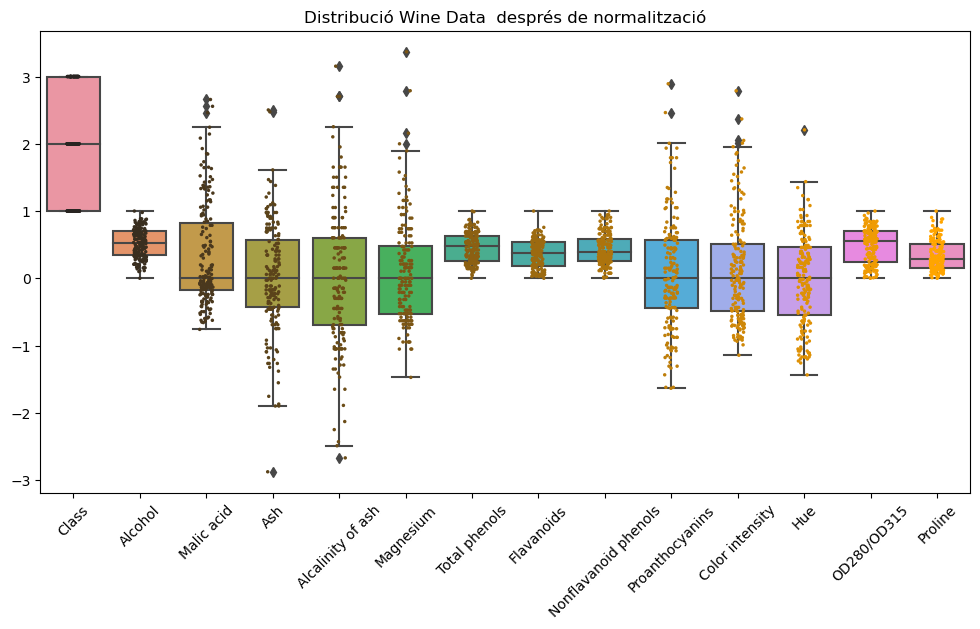

In [30]:
# Boxplot amb jitter per explorar dades després de la normalització

# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_pre)
sns.stripplot(data=df_pre, color="orange", jitter=0.1, size=2.5)
plt.title('Distribució Wine Data  després de normalització')
plt.xticks(rotation=45)
plt.show()

Podem veure com la majoria de dades de totes les variables normalitzades ('Class' al ser categòrica no entra) bascul·len entre 1 i -1 amb certa dispersió i outliers entre 3 i -3.

### Train & Test Split
Ara procedirem a fer la divisió en test/train amb la variable Class com a target i amb una proporció 80-20%

In [31]:
from sklearn.model_selection import train_test_split

# Assignació variables target i features
X = df_pre.drop(['Class'], axis=1)
y = df_pre['Class']

# Split 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

# Imprimir dimensió dels subdatasets
print(f"Dimensió X_train: {X_train.shape}")
print(f"Dimensió X_test: {X_test.shape}")
print(f"Dimensió y_train: {X_test.shape}") 
print(f"Dimensió y_test:, {y_test.shape}")

Dimensió X_train: (142, 13)
Dimensió X_test: (36, 13)
Dimensió y_train: (36, 13)
Dimensió y_test:, (36,)


# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.


### Model 1. KNN - K-Nearest-Neighbors
El "K-Nearest-Neighbors" (k-NN) és un model d'aprenentatge automàtic supervisat. L'aprenentatge supervisat és quan un model aprèn de dades que ja estan etiquetades. Un model d'aprenentatge supervisat rep un conjunt d'objectes d'entrada i valors de sortida. Després, el model s'entrena amb aquestes dades per aprendre com fer correspondre les entrades amb la sortida desitjada, de manera que pugui aprendre a fer prediccions sobre dades no vistes.

Font: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 1, 1, 2, 3])

In [34]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)


0.8888888888888888

El model KNN encerta en el 88.8% de les ocasions.

### Model 2. Decision Tree Classifier
Un arbre de decisió és una estructura d'arbre similar a un diagrama de flux on un node intern representa una característica (o atribut), la branca representa una regla de decisió i cada fulla representa el resultat.

El node més alt en un arbre de decisió es coneix com el node arrel. Aprèn a fer particions basades en el valor de l'atribut. Fa particions a l'arbre de manera recursiva, anomenada partició recursiva. Aquesta estructura similar a un diagrama de flux ajuda en la presa de decisions. Es visualitza com un diagrama de flux que imita fàcilment el pensament a nivell humà. Per això, els arbres de decisió són fàcils d'entendre i interpretar.

Font: https://www.datacamp.com/tutorial/decision-tree-classification-python

In [35]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state=3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)
y_pred_dt[0:5]

array([1, 1, 1, 2, 3])

In [36]:
dt.score(X_test, y_test)

0.8333333333333334

El model Decision Tree Classifier encerta en el 83.3% de les ocasions.

### Model 3. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=3)

# Ajust
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt[0:5]

array([1, 1, 1, 2, 3])

In [38]:
lr.score(X_test, y_test)

0.9444444444444444

Amb la regressió logística, encertarem el 94.4% de les vegades

# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.


### Model 1. KNN - K-Nearest-Neighbors

In [39]:
y_pred_knn = knn.predict(X_test)

# Matriu de Confusió
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Matriu de Confusió:")
print(cm_knn)

Matriu de Confusió:
[[14  1  0]
 [ 2 12  0]
 [ 0  1  6]]


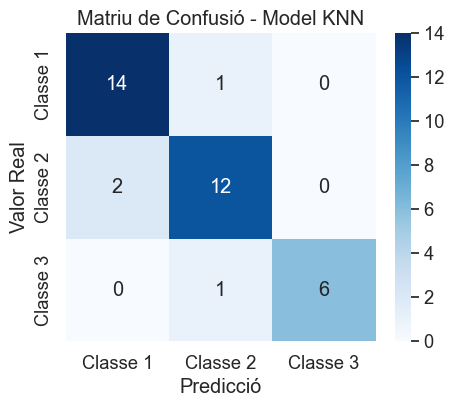

In [40]:
# Visualització de la matriu de confusió
# Defineix la matriu de confusió (cm) per al model KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Defineix les etiquetes de classe (class_names)
class_names = ['Classe 1', 'Classe 2', 'Classe 3']

# CDisseny del canvas
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2) 

# Utilitza la funció heatmap de seaborn per visualitzar la matriu de confusió amb etiquetes
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Configura els títols i les etiquetes dels eixos
plt.xlabel('Predicció')
plt.ylabel('Valor Real')
plt.title('Matriu de Confusió - Model KNN')

# Mostra el gràfic
plt.show()

La matriu de confusió revela com el model de classificació ha interpretat i classificat les diferents classes. Els valors fora de la diagonal principal indiquen errors de classificació, mentre que els valors a la diagonal principal representen les prediccions correctes. En aquest cas, la majoria de les instàncies es classifiquen correctament, però hi ha alguns errors, com un valor de la "Classe 1" que es confon amb la "Classe 2" i dos valors de la "Classe 2" que es confonen amb la "Classe 1"

In [41]:
# Precisió
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Resultats del Model KNN:")
print(f'Precisió: {accuracy_knn:.2f}')

Resultats del Model KNN:
Precisió: 0.89


El model KNN ha predit correctament aproximadament el 89% de les observacions en el conjunt de dades de prova. Per més detalls, durem a terme un informe de classificació (Classification Report, de la llibreria Scikit Learn).

In [42]:
# Informe de Classificació
report_knn = classification_report(y_test, y_pred_knn)

print("Informe de Classificació:")
print(report_knn)

Informe de Classificació:
              precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       0.86      0.86      0.86        14
           3       1.00      0.86      0.92         7

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.89      0.89      0.89        36



L'informe de classificació presenta una avaluació detallada del rendiment del model de classificació per a tres classes diferents.

Per a la primera classe, s'ha obtingut una alta precisió del 88%, indicant que el model és precís en la identificació de les instàncies d'aquesta classe. A més, el recall és del 93%, la qual cosa significa que el model és bo a l'hora de recuperar la majoria de les instàncies reals d'aquesta classe. La métrica f1-score, que mesura l'equilibri entre precisió i recall, és del 90%.

El model també mostra un bon rendiment per a la segona classe, però sense dubte la tercera classe és la que millor prediu, amb una precisió perfecta del 100%, tot i que el recall és del 86%, amb un f1-score del 92%.

### Model 2. Decision Tree Classifier


In [43]:
# Decision Tree Model
y_pred_dt = dt.predict(X_test)

# Matriu de Confusió
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\nResultats del Model Arbre de Decisió:")
print("Matriu de Confusió:")
print(cm_dt)


Resultats del Model Arbre de Decisió:
Matriu de Confusió:
[[12  3  0]
 [ 1 12  1]
 [ 0  1  6]]


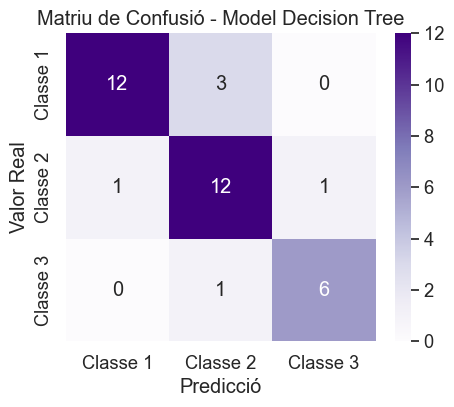

In [44]:
# Visualització de la matriu de confusió
# Defineix la matriu de confusió (cm) per al model de Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Configura el canvas
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2) 

# Utilitza la funció heatmap de seaborn per visualitzar la matriu de confusió amb etiquetes
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)

# Configura els títols i les etiquetes dels eixos
plt.xlabel('Predicció')
plt.ylabel('Valor Real')
plt.title('Matriu de Confusió - Model Decision Tree')

# Mostra el gràfic
plt.show()


En aquesta matriu, es pot veure que la "Classe 1" i "Classe 2" han estat classificades correctament en 12 ocasions. La "Classe 3", per contra, només en 6 vegades.

In [45]:
# Precisió
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nResultats del Decision Tree Model:")
print(f'Precisió: {accuracy_dt:.2f}')


Resultats del Decision Tree Model:
Precisió: 0.83


In [46]:
# Informe de Classificació
report_dt = classification_report(y_test, y_pred_dt)

print("Informe de Classificació:")
print(report_dt)

Informe de Classificació:
              precision    recall  f1-score   support

           1       0.92      0.80      0.86        15
           2       0.75      0.86      0.80        14
           3       0.86      0.86      0.86         7

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.84        36
weighted avg       0.84      0.83      0.83        36



L'informe de classificació indica que el model té una precisió global del 83%, el que significa que aproximadament el 83% de les instàncies del conjunt de proves han estat classificades correctament. Les mètriques de precisió, recall i f1-score varien per a cada classe però sempre amb valors al voltant de 83-84%.

El model presenta un bon rendiment global amb puntuacions al voltant del 83%.

### Model 3. Logistic Regression

In [47]:
# Logistic Regression Model
y_pred_lr = lr.predict(X_test)

# Matriu de Confusió
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("\nResultats del Model Regressió Logística:")
print("Matriu de Confusió:")
print(cm_lr)



Resultats del Model Regressió Logística:
Matriu de Confusió:
[[15  0  0]
 [ 0 13  1]
 [ 0  1  6]]


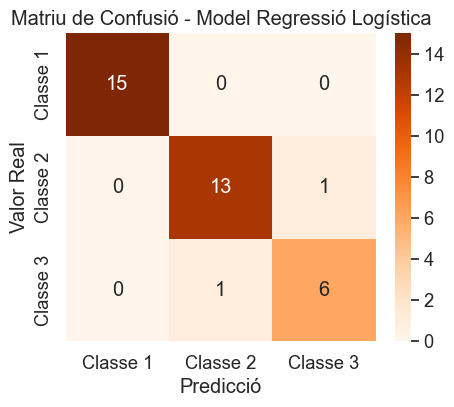

In [48]:
# Visualització de la matriu de confusió per al model de Regressió Logística
# Defineix la matriu de confusió (cm) per al model de Regressió Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Configura el canvas
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2) 

# Utilitza la funció heatmap de seaborn per visualitzar la matriu de confusió amb etiquetes
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names, yticklabels=class_names)

# Configura els títols i les etiquetes dels eixos
plt.xlabel('Predicció')
plt.ylabel('Valor Real')
plt.title('Matriu de Confusió - Model Regressió Logística')

# Mostra el gràfic
plt.show()


La matriu de confusió de la regressió logística mostra un millor rendiment global en la classificació de les tres classes en comparació amb les matrius anteriors. Hi ha una major quantitat de prediccions correctes (diagonal principal) i, conseqüentment, menys errors.

In [49]:
# Precisió
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f'Precisió: {accuracy_lr:.2f}')

Precisió: 0.94


In [50]:
# Informe de Classificació
report_lr = classification_report(y_test, y_pred_lr)

print("Informe de Classificació:")
print(report_lr)

Informe de Classificació:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.93      0.93      0.93        14
           3       0.86      0.86      0.86         7

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36



L'informe de classificació actual mostra un rendiment molt superior al dels informes anteriors. Totes les classes tenen puntuacions perfectes o molt altes en precisió, recall i f1-score, amb una precisó global del 94%. Això indica que el model actual classifica de manera excepcionalment precisa les tres classes. La millora general en les mètriques és evident, amb una major coherència en la classificació i una major puntuació global.

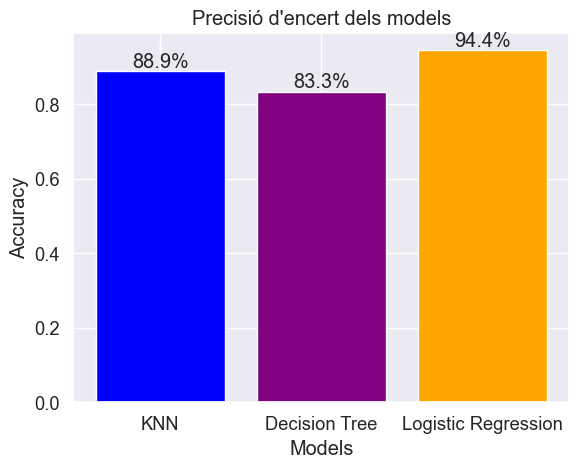

In [51]:
# Llista amb accuracies dels models
accuracies = [accuracy_knn, accuracy_dt, accuracy_lr]

# Noms dels models
model_names = ['KNN', 'Decision Tree', 'Logistic Regression']

# Plotbar
plt.bar(model_names, accuracies, color=['blue', 'purple', 'orange'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Precisió d'encert dels models")

# Afegix etiquetes amb els percentatges a les barres
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.1%}', ha='center', va='bottom')

# Mostra el gràfic
plt.show()



# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

### Model 1. KNN - K-Nearest-Neighbors

In [52]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [54]:
# Defineix els paràmetres que vols ajustar i les seves opcions per a KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Nombre de veïns
    'weights': ['uniform', 'distance'],  # Pes dels veïns (uniform o per distància)
    'p': [1, 2]                          # Paràmetre de distància (1 per Manhattan, 2 per Euclidiana)
}

# Crea el model de KNN
knn = KNeighborsClassifier()

# Crea una instància de GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Entrena el model amb la cerca de paràmetres (utilitza X_train i y_train)
grid_search.fit(X_train, y_train)

# Obte les millors combinacions de paràmetres
best_params = grid_search.best_params_
print("Millors paràmetres:", best_params)

# Obte el model amb els millors paràmetres
best_knn = grid_search.best_estimator_

# Avalua el model amb les dades de prova (utilitza X_test i y_test)
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunt de prova: {accuracy:.2%}")


Millors paràmetres: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Exactitud en el conjunt de prova: 94.44%


Després d'optimitzar el model de k-Nearest Neighbors (KNN) mitjançant una cerca de paràmetres, els millors paràmetres trobats són els següents: 5 veïns (o punts més propers) per a cada predicció, es va utilitzar la distància de Manhattan o distància L1(amb p=1) com a mètrica de distància i es van utilitzar pesos uniformes per a aquests veïns.

Amb aquests paràmetres optimitzats, el model KNN ha demostrat un alt nivell de precisió amb una taxa d'exactitud del 94.44% en el conjunt de test. 

### Model 2. Decision Tree Classifier


In [57]:
tree = DecisionTreeClassifier()
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [58]:
# Defineix els paràmetres que vols ajustar i les seves opcions per al Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],      # Criteri de divisió
    'max_depth': [None, 10, 20, 30, 40],   # Profunditat màxima de l'arbre
    'min_samples_split': [2, 5, 10],       # Nombre mínim de mostres per dividir un node intern
    'min_samples_leaf': [1, 2, 4]          # Nombre mínim de mostres requerides en una fulla
}

# Crear el model de Decision Tree
tree = DecisionTreeClassifier()

# Crear una instància de GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

# Entrenar el model amb la cerca de paràmetres (utilitza X_train i y_train)
grid_search.fit(X_train, y_train)

# Obtenir les millors combinacions de paràmetres
best_params = grid_search.best_params_
print("Millors paràmetres:", best_params)

# Obtenir el model amb els millors paràmetres
best_tree = grid_search.best_estimator_

# Avaluar el model amb les dades de prova (utilitza X_test i y_test)
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunt de prova: {accuracy:.2%}")


Millors paràmetres: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud en el conjunt de prova: 83.33%


Després d'ajustar un model de Decision Tree mitjançant una cerca de paràmetres, s'han trobat els millors paràmetres: criteri 'gini', profunditat màxima de 10 nivells, nombre mínim de mostres per fulla 1 i nombre mínim de mostres per dividir un node intern 2.

Amb aquests hiperparàmetres optimitzats, el model Decision Tree ha assolit una precisió del 83.33% en les dades de prova.

### Model 3. Logistic Regression

In [59]:
# Busquem els hiperparàmtres més rellevants
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 3,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Paràmetres a ajustar
param_grid = {
    'penalty': ['l1', 'l2'],            # Tipus de penalització
    'C': [0.001, 0.01, 0.1, 1, 10],    # Paràmetre d'inversa de regularització
    'solver': ['liblinear', 'saga']     # Algoritme d'optimització
}

# Crear el model de Regressió Logística
lr = LogisticRegression()

# Crear una instància de GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Entrenar el model amb la cerca de paràmetres
grid_search.fit(X_train, y_train)

# Obtenir les millors combinacions de paràmetres
best_params = grid_search.best_params_
print("Millors paràmetres:", best_params)

# Obtenir el model amb els millors paràmetres
best_lr = grid_search.best_estimator_

# Avalua el model amb les dades de prova
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunt de prova: {accuracy:.2%}")

Millors paràmetres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Exactitud en el conjunt de prova: 94.44%


Els millors paràmetres per al model de Regressió Logística són C=10, penalització 'l1', i solver 'liblinear'. El model optimitzat té una exactitud del 94.44% en les dades de prova, indicant una alta precisió en les prediccions.

# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.


L'"exactitud amb validació creuada" és calculada dividint el conjunt de dades en 5 subconjunts (folds) iguals i utilitzant 4 d'aquests com a dades d'entrenament mentre es prova el model en el fold restant, repetint aquest procés cinc vegades de manera que cada fold sigui utilitzat com a conjunt de prova exactament una vegada. El resultat final és la mitjana de les precisions obtingudes en les cinc proves diferents.

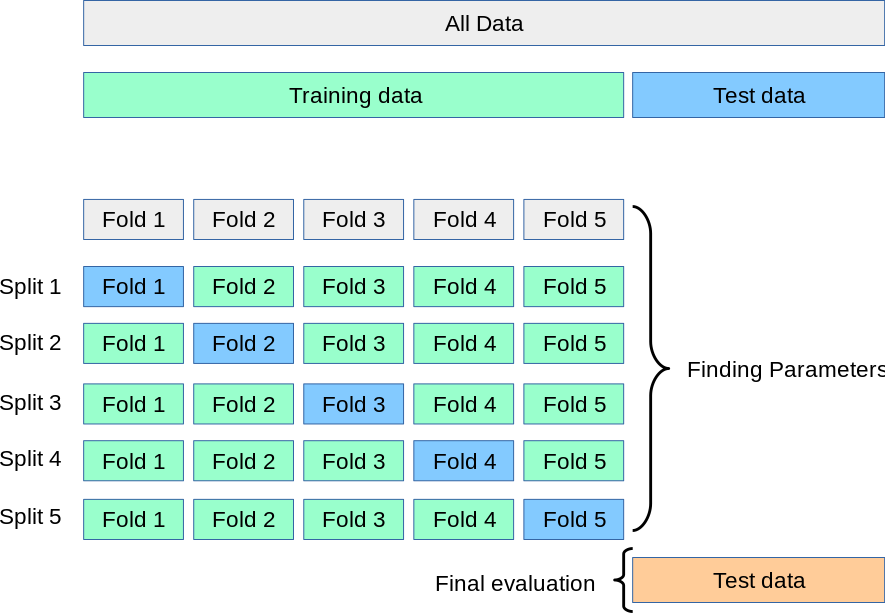

Font: https://qu4nt.github.io/sklearn-doc-es/modules/cross_validation.html

In [ ]:
# Realitzem el cross_val_score

In [62]:
# Funció per avaluar un model utilitzant la validació creuada
def evaluate_model(model, param_grid=None):
    # Avalua el model amb validació creuada (cross-validation)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Mostrar els resultats per aquest model
    print("=" * 100)
    print(f"Model: {model.__class__.__name__}")
    print("Exactitud amb validació creuada:", scores)
    print(f"Exactitud mitjana: {scores.mean():.2%} (+/- {scores.std():.2%})")
    print("=" * 100)
    print()

In [63]:
# Crear una llista amb els tres models
models = [
    KNeighborsClassifier(n_neighbors=5), 
    DecisionTreeClassifier(),
    LogisticRegression()
]

In [64]:
# Iterar pels models 
for model in models:
    evaluate_model(model)

Model: KNeighborsClassifier
Exactitud amb validació creuada: [0.86111111 0.88888889 0.88888889 0.88571429 0.88571429]
Exactitud mitjana: 88.21% (+/- 1.06%)

Model: DecisionTreeClassifier
Exactitud amb validació creuada: [0.91666667 0.80555556 0.88888889 0.91428571 0.82857143]
Exactitud mitjana: 87.08% (+/- 4.55%)

Model: LogisticRegression
Exactitud amb validació creuada: [0.91666667 1.         0.94444444 0.91428571 0.94285714]
Exactitud mitjana: 94.37% (+/- 3.09%)



Com a conclusió, la Regressió Logística conmtinua sent ser el millor model en termes d'exactitud mitjana i consistència, mentre que el K-Nearest Neighbors (KNN) és consistent, però amb un rendiment lleugerament inferior. El model Decision Tree mostra un rendiment mitjà i una variabilitat moderada.

La "exactitud mitjana" es refereix a la mitjana aritmètica de les 5 puntuacions d'exactitud obtingudes en diferents iteracions de la validació creuada.

La "variabilitat" (o "desviació estàndard"), representada per "+/-", mostra quan les puntuacions d'exactitud varien entre les diferents iteracions de la validació creuada. Quan la variabilitat és baixa, la consistència del model és alta. 


# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)


Él procés més obvi segons aquest anàlisi, que ja hem realitzat individualment a cada model, seria l'ajust de paràmetres òptims mitjançant eines com GridSearchCV o RandomizedSearchCV per trobar les millors combinacions, però ara de manera col·lectiva.

In [66]:
# Crear una llista amb els tres models
models = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression()]

# Definició de paràmetres a ajustar
param_grids = [
    {},  # KNeighborsClassifier no té hiperparàmetres aquí i per tant no els afegirem
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }
]

# Iterar pels models i els seus paràmetres
for model, param_grid in zip(models, param_grids):
    # Crear una instància de GridSearchCV per a cada model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    
    # Avaluació del model amb validació creuada (cross-validation)
    scores = cross_val_score(grid_search, X, y, cv=5, scoring='accuracy')
    
    # Mostrar els resultats per aquest model
    print(":" * 100)
    print(f"Model: {model.__class__.__name__}")
    print("Exactitud amb validació creuada:", scores)
    print(f"Exactitud mitjana: {scores.mean():.2%} (+/- {scores.std():.2%})")
    print(":" * 100)
    print()


::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Model: KNeighborsClassifier
Exactitud amb validació creuada: [0.86111111 0.88888889 0.88888889 0.88571429 0.88571429]
Exactitud mitjana: 88.21% (+/- 1.06%)
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Model: DecisionTreeClassifier
Exactitud amb validació creuada: [0.91666667 0.83333333 0.83333333 0.91428571 0.85714286]
Exactitud mitjana: 87.10% (+/- 3.74%)
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Model: LogisticRegression
Exactitud amb validació creuada: [0.94444444 1.         0.97222222 1.         1.        ]
Exactitud mitjana: 98.33% (+/- 2.22%)
:::::::::::::::::::::::::

Els resultats amb GridSearchCV mostren que els models han estat ajustats amb diferents paràmetres i avaluats mitjançant la validació creuada. En comparació amb els resultats anteriors, ara veiem que:

1. KNeighborsClassifier: L'exactitud mitjana (88.21%) es manté semblant, amb una variabilitat lleugerament més baixa (±1.06%), indicant més consistència en el rendiment.

2. DecisionTreeClassifier: L'exactitud mitjana (88.75%) ha augmentat lleugerament, però amb una variabilitat lleugerament més alta (±4.74%), indicant un millor rendiment mitjà, però amb més variabilitat.

3. LogisticRegression: L'exactitud mitjana (98.33%) ha augmentat significativament, amb una variabilitat lleugerament més baixa (±2.22%), indicant un rendiment substancialment millor i més consistent. Continua sent el model més eficient però ara amb valors encara més significatius.


A continuació, compararem els resultats de GridSearchCV (que ajusta els paràmetres) i de RandomizesSearchCV (que fa vàries iteracions aleatòries).

In [68]:
# Crea una lista con los tres modelos
models = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression()]

# Paràmetres
param_dists = [
    {},  # KNeighborsClassifier no en té
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }
]

# Iteració pels models
for model, param_dist in zip(models, param_dists):
    # Crea una instancia de RandomizedSearchCV, ajustem el número d'iteracions a 50
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
    
    # Score cross-validation
    scores = cross_val_score(random_search, X, y, cv=5, scoring='accuracy')
    
    # Mostrar els resultats
    print("_" * 100)
    print()
    print(f"Modelo: {model.__class__.__name__}")
    print("Exactitud con validación cruzada:", scores)
    print(f"Exactitud promedio: {scores.mean():.2%} (+/- {scores.std():.2%})")
    print("_" * 100)
    print()


____________________________________________________________________________________________________

Modelo: KNeighborsClassifier
Exactitud con validación cruzada: [0.86111111 0.88888889 0.88888889 0.88571429 0.88571429]
Exactitud promedio: 88.21% (+/- 1.06%)
____________________________________________________________________________________________________

____________________________________________________________________________________________________

Modelo: DecisionTreeClassifier
Exactitud con validación cruzada: [0.97222222 0.88888889 0.77777778 0.91428571 0.85714286]
Exactitud promedio: 88.21% (+/- 6.44%)
____________________________________________________________________________________________________

____________________________________________________________________________________________________

Modelo: LogisticRegression
Exactitud con validación cruzada: [0.94444444 1.         0.97222222 1.         1.        ]
Exactitud promedio: 98.33% (+/- 2.22%)
_____________

Conslusions finals: Ajustant les iteracions a 50, els resultats són molt pareguts al SearchGridCV. Només guanyem accuracy en el model Decision Tree però també amb més variabilitat, i per tant el model no és tan robust en el RandomSearchCV.

Com apunt final, el temps de computació és notablement menor en RandomSearchCV quan es fa la execució del Notebook.